# Features Exploration

1. ~~User Language~~
2. ~~Profile Category~~
3. ~~Profile Creation Timestamp~~
4. ~~Is Profile View Size Customized?~~
5. Username
6. ~~Profile Verification Status~~

In [1]:
# Imports and set up

#### FOR MAC OSX USERS ####
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline 
##########################

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

from utils.missing_values_filler import MissingValuesFiller

In [2]:
# Load train dataset
raw_df = pd.read_csv("src_data/train.csv")

# User Language

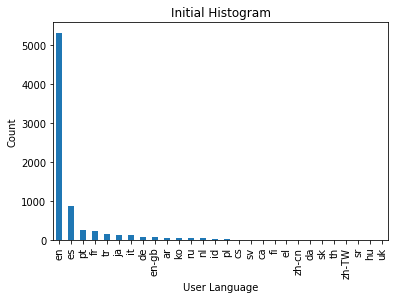

Not english count: 2179


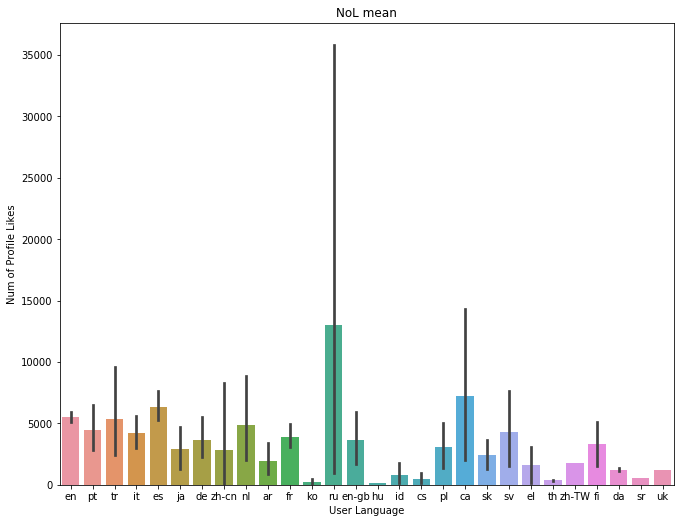

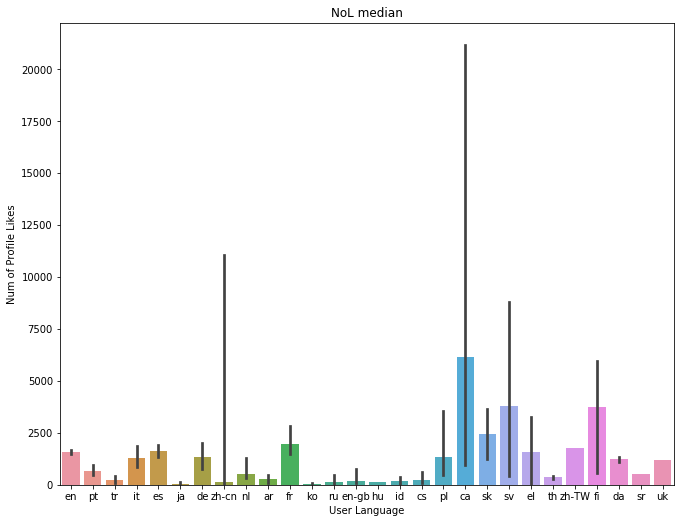

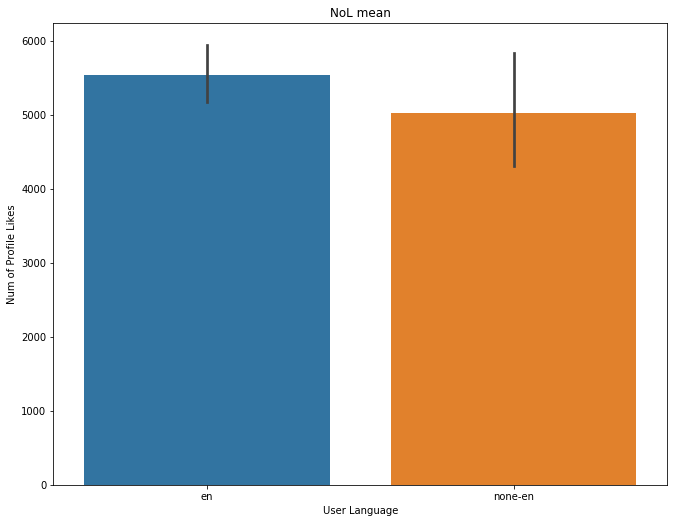

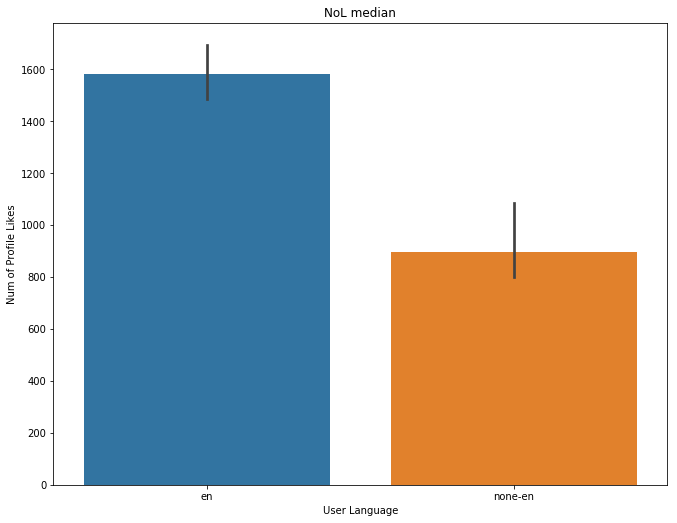

In [3]:
# Histogram

raw_df['User Language'].value_counts().plot(kind='bar')
plt.xlabel('User Language')
plt.ylabel('Count')
plt.title('Initial Histogram')
plt.show()

print("Not english count: {}".format(len(raw_df[raw_df['User Language'] != 'en'])))

# Barplot

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=raw_df, estimator=np.mean).set_title('NoL mean')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=raw_df, estimator=np.median).set_title('NoL median')
plt.show()

# Separate 'en' and none-'en' records

lang_df = raw_df.copy(deep=True)
lang_df['User Language'] = raw_df['User Language'].apply(lambda val: 'en' if val == 'en' else 'none-en')

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=lang_df, estimator=np.mean).set_title('NoL mean')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=lang_df, estimator=np.median).set_title('NoL median')
plt.show()

# Profile Category

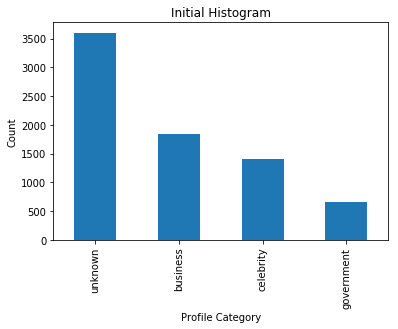

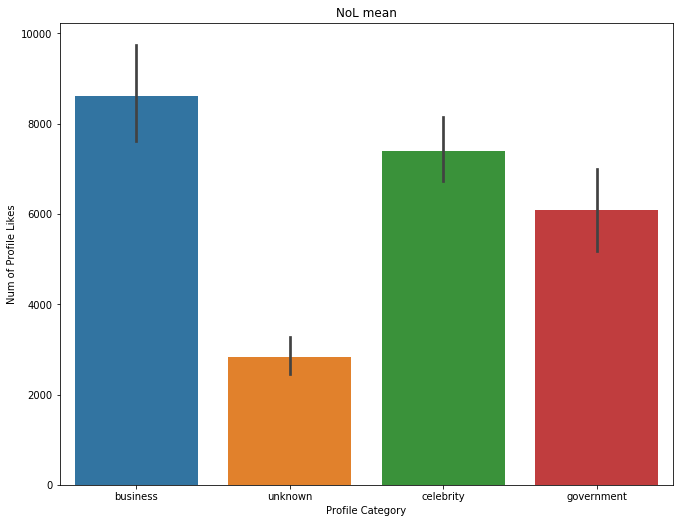

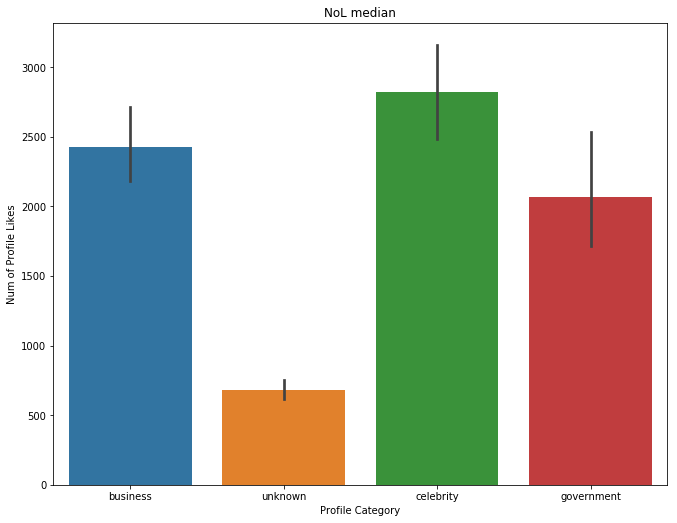

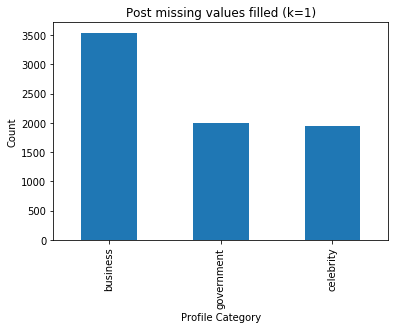

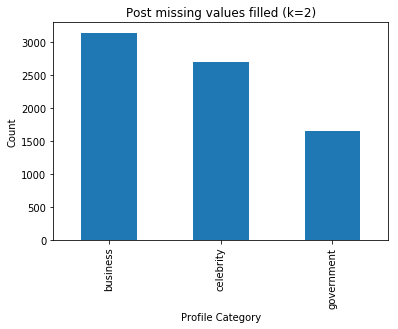

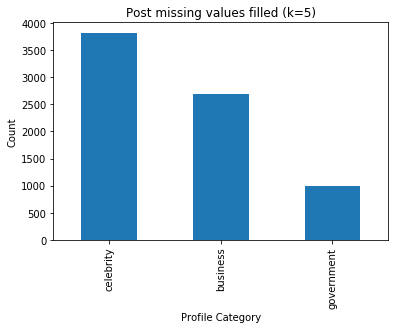

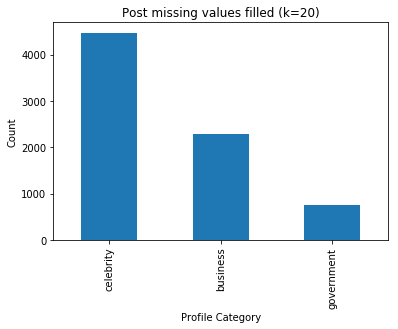

In [4]:
# Clean
profile_df = raw_df.copy(deep=True)
profile_df['Profile Category'] = profile_df['Profile Category'].replace(r'^\s*$', 'unknown', regex=True)

# Histogram

profile_df['Profile Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Category')
plt.ylabel('Count')
plt.title('Initial Histogram')
plt.show()

# Barplots

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Category", y="Num of Profile Likes", data=profile_df, estimator=np.mean).set_title('NoL mean')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Category", y="Num of Profile Likes", data=profile_df, estimator=np.median).set_title('NoL median')
plt.show()

# Missing values filler
mvf = MissingValuesFiller()

# K = 1
profile_df = raw_df.copy(deep=True)
profile_df['Profile Category'] = profile_df['Profile Category'].replace(r'^\s*$', 'unknown', regex=True)
profile_df = mvf.fill_missing_values(profile_df, 'Profile Category', 'unknown', 'Num of Status Updates', 1)

profile_df['Profile Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Category')
plt.ylabel('Count')
plt.title('Post missing values filled (k=1)')
plt.show()

# K = 2
profile_df = raw_df.copy(deep=True)
profile_df['Profile Category'] = profile_df['Profile Category'].replace(r'^\s*$', 'unknown', regex=True)
profile_df = mvf.fill_missing_values(profile_df, 'Profile Category', 'unknown', 'Num of Status Updates', 2)

profile_df['Profile Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Category')
plt.ylabel('Count')
plt.title('Post missing values filled (k=2)')
plt.show()

# K = 5
profile_df = raw_df.copy(deep=True)
profile_df['Profile Category'] = profile_df['Profile Category'].replace(r'^\s*$', 'unknown', regex=True)
profile_df = mvf.fill_missing_values(profile_df, 'Profile Category', 'unknown', 'Num of Status Updates', 5)

profile_df['Profile Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Category')
plt.ylabel('Count')
plt.title('Post missing values filled (k=5)')
plt.show()

# K = 20
profile_df = raw_df.copy(deep=True)
profile_df['Profile Category'] = profile_df['Profile Category'].replace(r'^\s*$', 'unknown', regex=True)
profile_df = mvf.fill_missing_values(profile_df, 'Profile Category', 'unknown', 'Num of Status Updates', 20)

profile_df['Profile Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Category')
plt.ylabel('Count')
plt.title('Post missing values filled (k=20)')
plt.show()

# Profile Verification Status

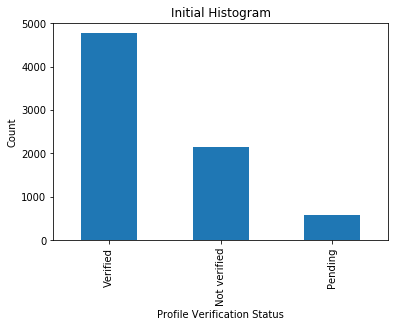

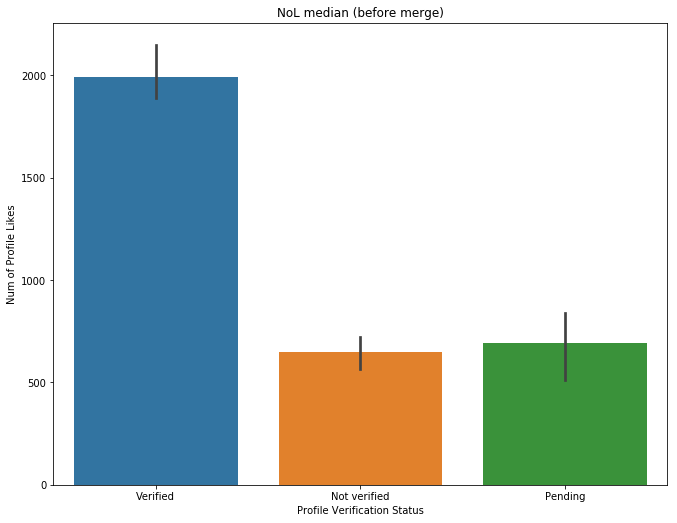

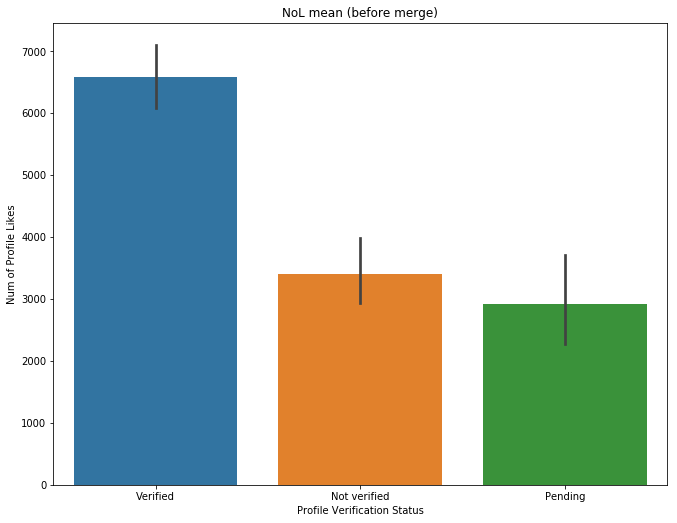

'Pending' is the exact same as 'Not verified' when we want to predict the 'Profile Num of Likes' ...


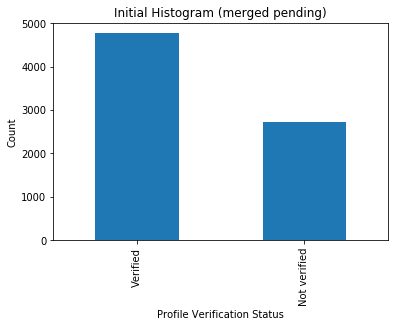

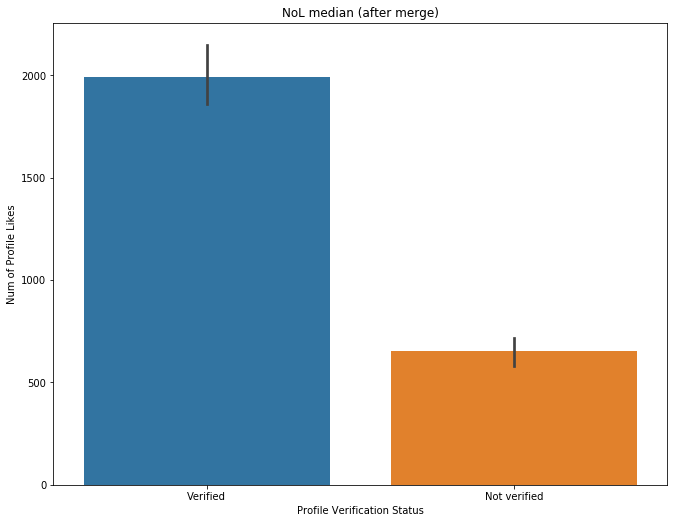

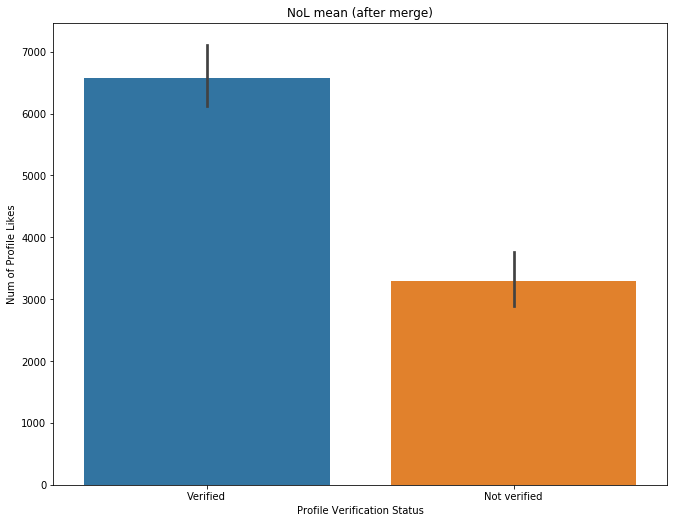

In [5]:
# Load a copy
profile_df = raw_df.copy(deep=True)

# Histogram

profile_df['Profile Verification Status'].value_counts().plot(kind='bar')
plt.xlabel('Profile Verification Status')
plt.ylabel('Count')
plt.title('Initial Histogram')
plt.show()

# Barplot

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Verification Status", y="Num of Profile Likes", data=profile_df, estimator=np.median).set_title('NoL median (before merge)')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Verification Status", y="Num of Profile Likes", data=profile_df, estimator=np.mean).set_title('NoL mean (before merge)')
plt.show()

# Clean pending

print("'Pending' is the exact same as 'Not verified' when we want to predict the 'Profile Num of Likes' ...")
profile_df['Profile Verification Status'] = profile_df['Profile Verification Status'].replace('Pending', 'Not verified', regex=True)

# Histogram

profile_df['Profile Verification Status'].value_counts().plot(kind='bar')
plt.xlabel('Profile Verification Status')
plt.ylabel('Count')
plt.title('Initial Histogram (merged pending)')
plt.show()

# Barplot

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Verification Status", y="Num of Profile Likes", data=profile_df, estimator=np.median).set_title('NoL median (after merge)')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Verification Status", y="Num of Profile Likes", data=profile_df, estimator=np.mean).set_title('NoL mean (after merge)')
plt.show()

# Is Profile View Customized

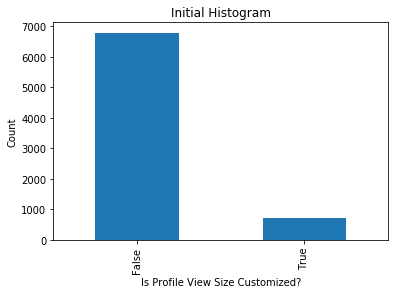

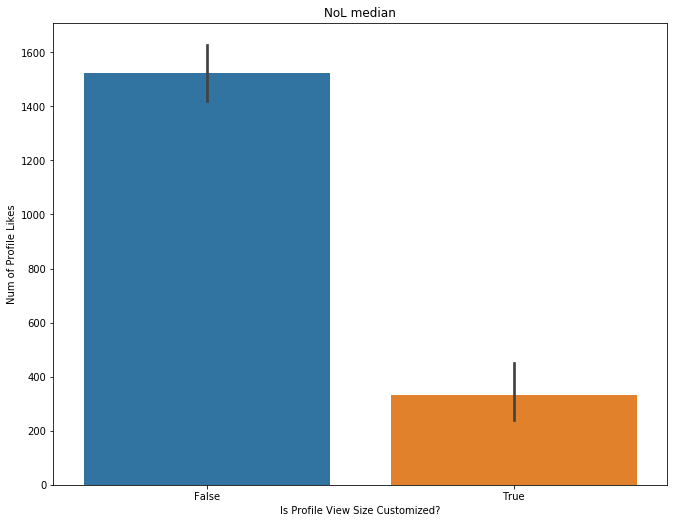

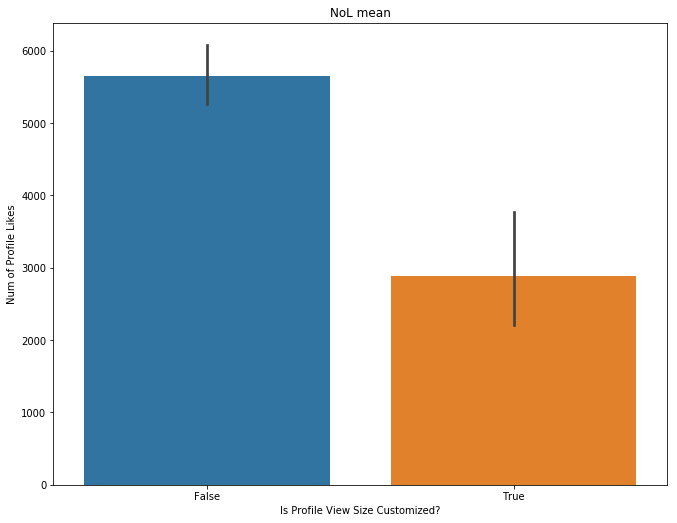

In [6]:
# Load a copy
profile_df = raw_df.copy(deep=True)

# Histogram
profile_df['Is Profile View Size Customized?'].value_counts().plot(kind='bar')
plt.xlabel('Is Profile View Size Customized?')
plt.ylabel('Count')
plt.title('Initial Histogram')
plt.show()

# Barplot

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Is Profile View Size Customized?", y="Num of Profile Likes", data=profile_df, estimator=np.median).set_title('NoL median')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Is Profile View Size Customized?", y="Num of Profile Likes", data=profile_df, estimator=np.mean).set_title('NoL mean')
plt.show()

# Profile Creation Timestamp

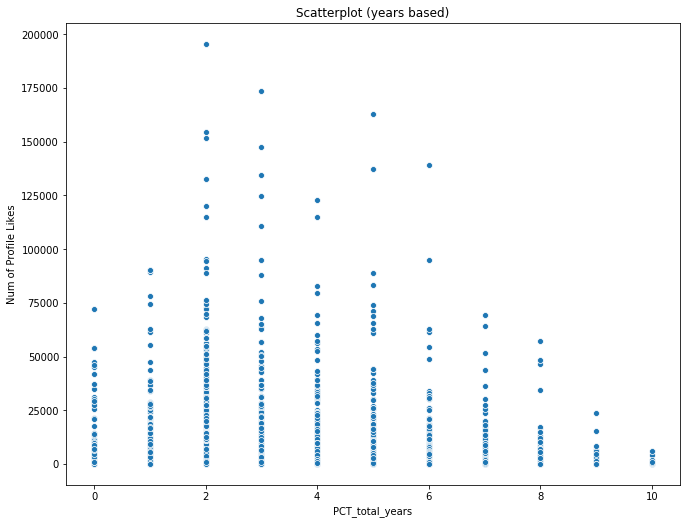

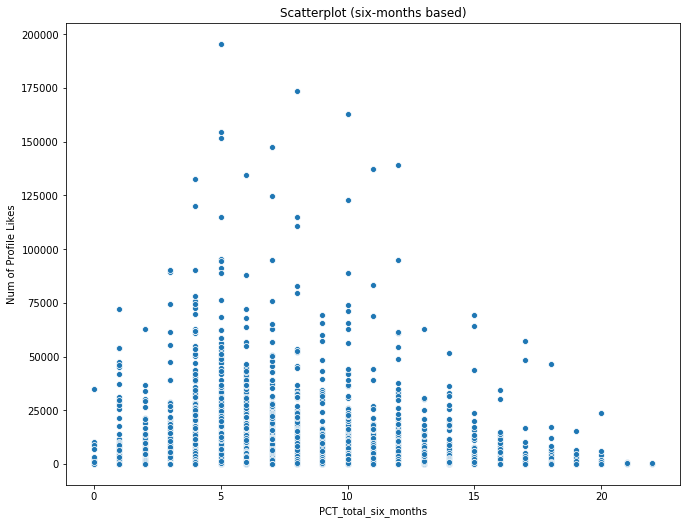

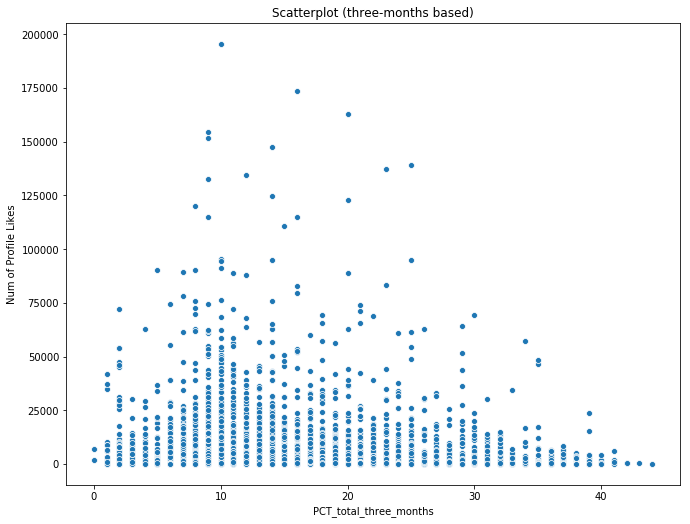

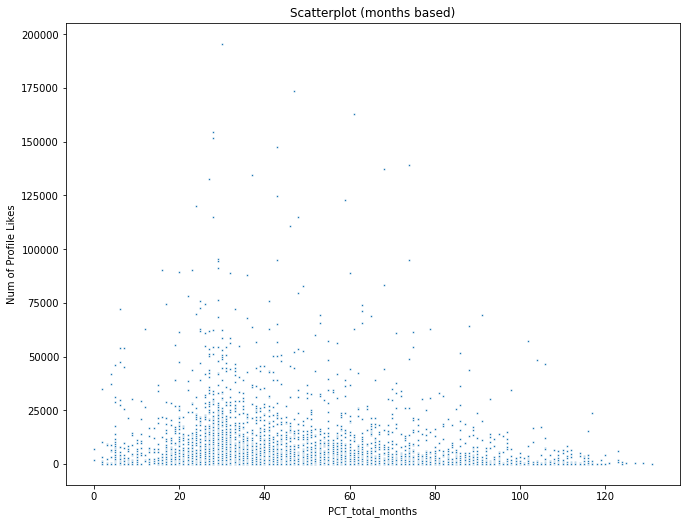

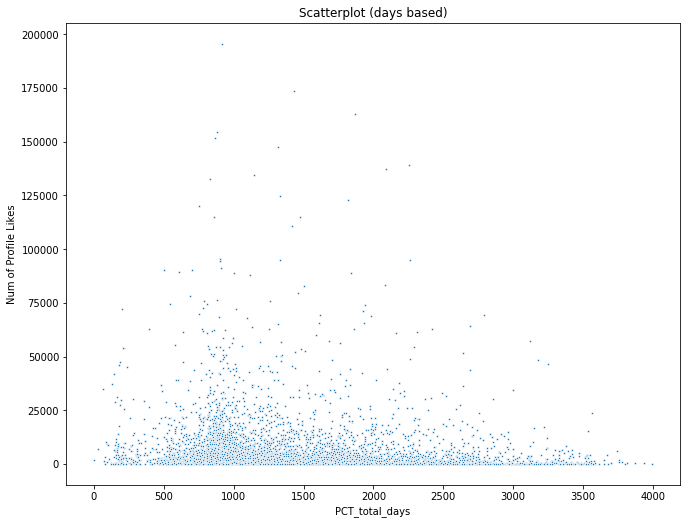

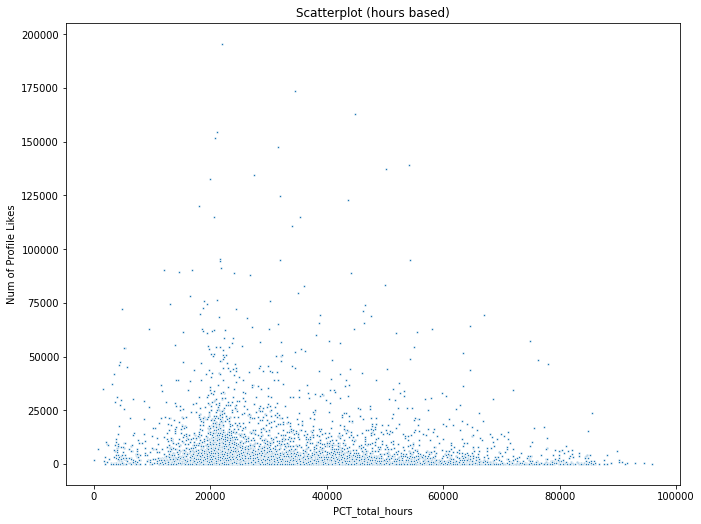

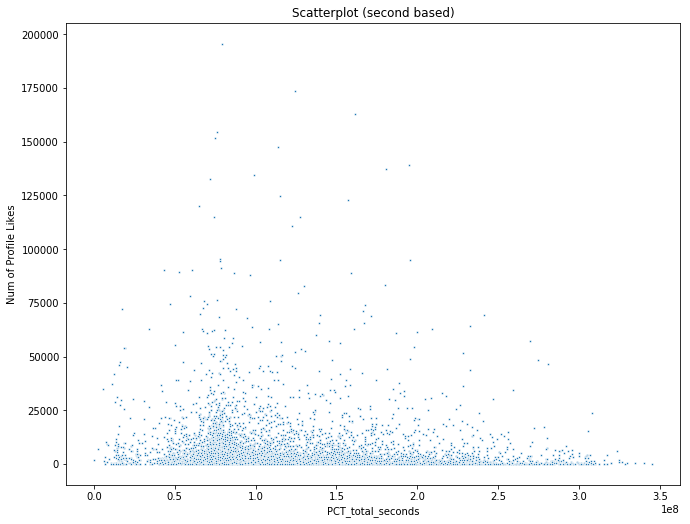

In [17]:
# Load a copy
field_name = 'Profile Creation Timestamp'
profile_df = raw_df.copy(deep=True)

# Validate it all in UTC
for i, v in profile_df[field_name].items():
    if not "+0000" in v:
        print(v)
    # Validate 24h based
    # if " 14:" in v:
    # print(v) ... (Yes)

# Remove hardcoded outliers
profile_df = profile_df[profile_df['Num of Profile Likes'] < 200000]

# Build datetime col
profile_df['PCT_dt'] = pd.to_datetime(profile_df[field_name])

# Calc min and max dates
min_date = min(profile_df['PCT_dt'])
max_date = max(profile_df['PCT_dt'])

# Convert to int column based on years
profile_df['PCT_total_years'] = (profile_df['PCT_dt']-min_date).astype('timedelta64[Y]')

# Convert to int column based on six-months
profile_df['PCT_total_six_months'] = ((profile_df['PCT_dt']-min_date).astype('timedelta64[M]') / 6).round()

# Convert to int column based on three-months
profile_df['PCT_total_three_months'] = ((profile_df['PCT_dt']-min_date).astype('timedelta64[M]') / 3).round()

# Convert to int column based on months
profile_df['PCT_total_months'] = (profile_df['PCT_dt']-min_date).astype('timedelta64[M]').round(0)

# Convert to int column based on days
profile_df['PCT_total_days'] = (profile_df['PCT_dt']-min_date).astype('timedelta64[D]').round(0)

# Convert to int column based on hours
profile_df['PCT_total_hours'] = (profile_df['PCT_dt']-min_date).astype('timedelta64[h]').round()

# Convert to int column based on hours
profile_df['PCT_total_seconds'] = (profile_df['PCT_dt']-min_date).astype('timedelta64[s]').round()

# Verify
# Following is the same between the max & min dates
# 3995 days, 10 hours, 35 minutes, and 46 seconds
# 3,995.4415 days
# 95,890.596 hours
# 5,753,435.77 minutes
# 345,206,146 seconds
# print(min_date)
# print(max_date)
# print(min(profile_df['PCT_total_hours']))
# print(max(profile_df['PCT_total_hours']))
# print(max(profile_df['PCT_total_hours']) - max_date.astype('timedelta64[h]'))

# Scatterplot

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.scatterplot(data=profile_df, x="PCT_total_years", y="Num of Profile Likes").set_title("Scatterplot (years based)")
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.scatterplot(data=profile_df, x="PCT_total_six_months", y="Num of Profile Likes").set_title("Scatterplot (six-months based)")
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.scatterplot(data=profile_df, x="PCT_total_three_months", y="Num of Profile Likes").set_title("Scatterplot (three-months based)")
plt.show()


fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.scatterplot(data=profile_df, x="PCT_total_months", y="Num of Profile Likes", s=6).set_title("Scatterplot (months based)")
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.scatterplot(data=profile_df, x="PCT_total_days", y="Num of Profile Likes", s=6).set_title("Scatterplot (days based)")
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.scatterplot(data=profile_df, x="PCT_total_hours", y="Num of Profile Likes", s=6).set_title("Scatterplot (hours based)")
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.scatterplot(data=profile_df, x="PCT_total_seconds", y="Num of Profile Likes", s=6).set_title("Scatterplot (second based)")
plt.show()